the features are: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
train data size: ((221, 1), (221,))
test size: ((221, 1), (221,))
LR model coefficients: [736.84570941]
LR model intercept: 155.33443955611776
linear regression MSE: 5029.607003402419


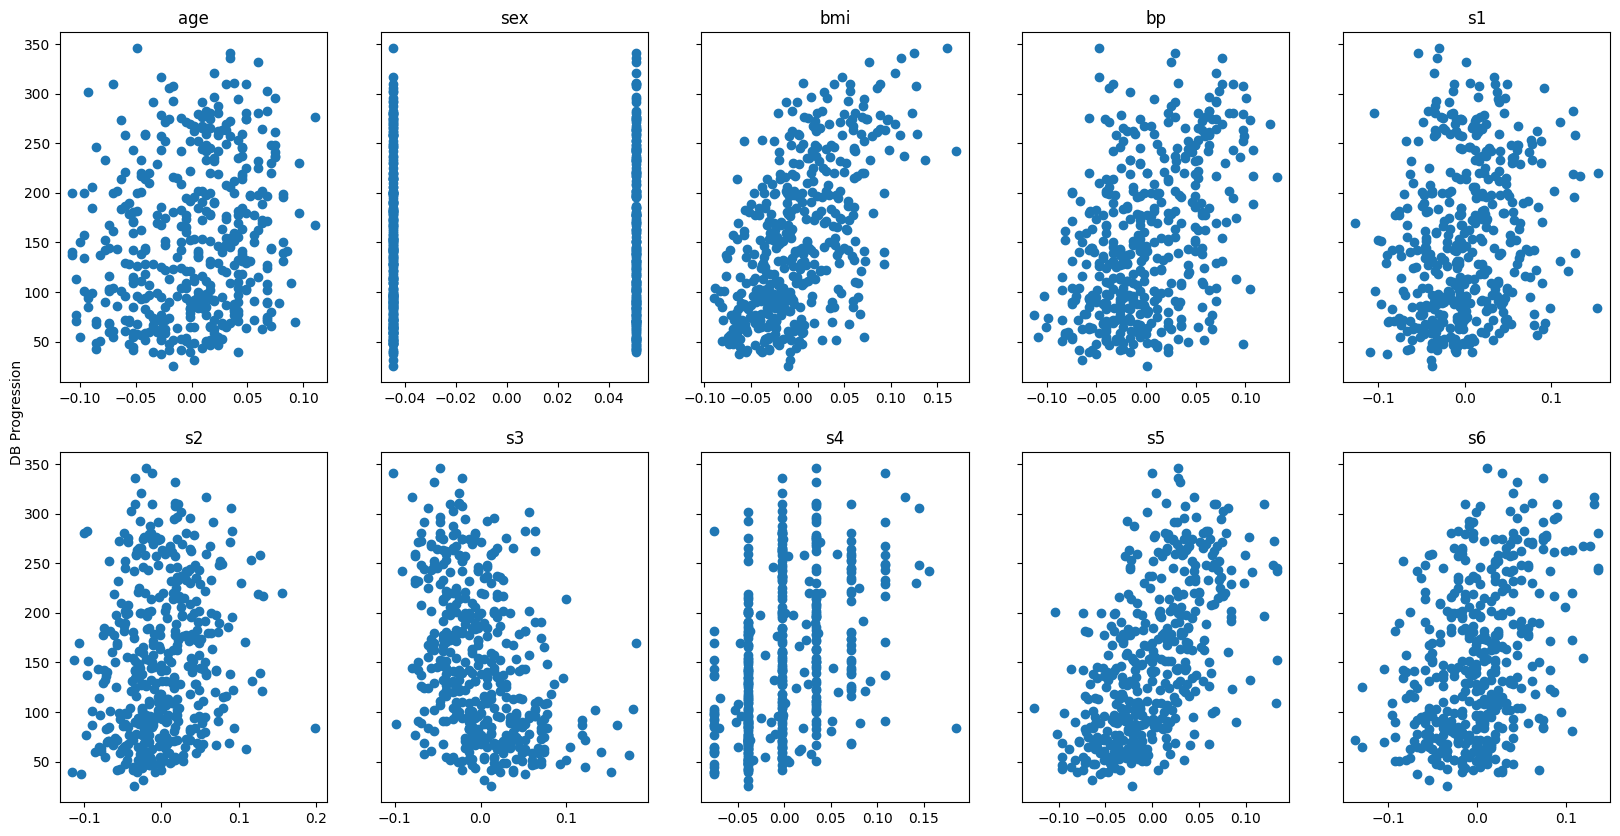

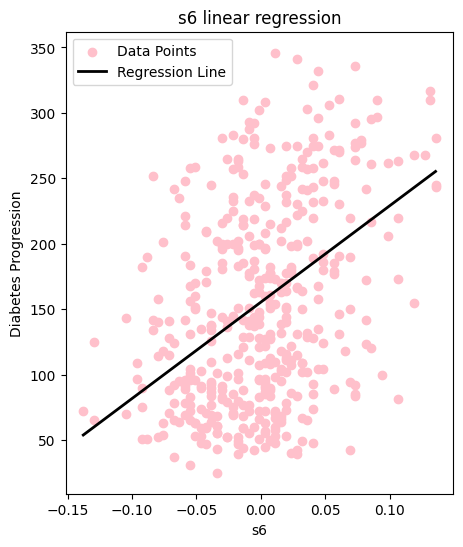

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = load_diabetes(as_frame=True)
df_d = data.frame

print(f"the features are: {data.feature_names}")

fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=True)
cols = df_d.columns[:-1]

for i, ax in enumerate(axes.flatten()):
    ax.scatter(x=df_d[cols[i]], y=df_d['target'])
    ax.set_title(str(cols[i]))

fig.text(0.1, 0.5, 'DB Progression', va='center', rotation='vertical')

feature_name = 's6'
X = df_d[[feature_name]].values
y = df_d['target']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=1)
print(f"train data size: {X_train1.shape, y_train1.shape}")
print(f"test size: {X_test1.shape, y_test1.shape}")

lr_model = LinearRegression().fit(X_train1, y_train1)

print(f"LR model coefficients: {lr_model.coef_}")
print(f"LR model intercept: {lr_model.intercept_}")

mse_lr = mean_squared_error(y_test1, lr_model.predict(X_test1))
print(f"linear regression MSE: {mse_lr}")

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = lr_model.predict(X_range)

plt.figure(figsize=(5, 6))
plt.scatter(X, y, color='pink', label='Data Points')
plt.plot(X_range, y_pred, color='black', linewidth=2, label='Regression Line')

plt.xlabel(feature_name)
plt.ylabel('Diabetes Progression')
plt.title(f'{feature_name} linear regression')
plt.legend()

plt.show()

Multiple Linear Regression MSE (using all features): 2992.581229301017
Decision Tree Regression MSE (using all features): 6703.29213483146

Comparison of MSE:
Multiple Linear Regression MSE: 2992.581229301017
Decision Tree Regression MSE: 6703.29213483146


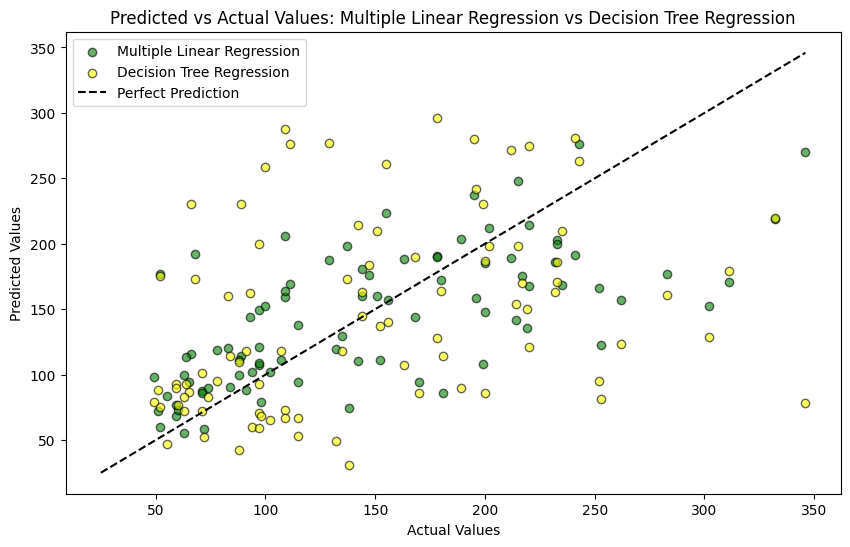

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
data = load_diabetes(as_frame=True)
df_d = data.frame

# Target variable
y = df_d['target']

### Multiple Linear Regression (using all features)
X_multiple = df_d.drop(columns='target')  # All features except the target

# Split data into training and testing sets (for both models)
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=1)

# Train Multiple Linear Regression Model
lr_model_multiple = LinearRegression().fit(X_train_multiple, y_train_multiple)

# Predict and calculate MSE for Multiple Linear Regression
y_pred_multiple = lr_model_multiple.predict(X_test_multiple)
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
print(f"Multiple Linear Regression MSE (using all features): {mse_multiple}")

### Decision Tree Regression (using all features)
# Train Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=1).fit(X_train_multiple, y_train_multiple)

# Predict and calculate MSE for Decision Tree Regression
y_pred_dt = dt_model.predict(X_test_multiple)
mse_dt = mean_squared_error(y_test_multiple, y_pred_dt)
print(f"Decision Tree Regression MSE (using all features): {mse_dt}")

### MSE Comparison
print(f"\nComparison of MSE:")
print(f"Multiple Linear Regression MSE: {mse_multiple}")
print(f"Decision Tree Regression MSE: {mse_dt}")

### Plot: Comparison of Multiple Linear Regression vs Decision Tree Regression
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted (Multiple Linear Regression)
plt.scatter(y_test_multiple, y_pred_multiple, color='green', edgecolor='k', label='Multiple Linear Regression', alpha=0.6)

# Scatter plot for actual vs predicted (Decision Tree Regression)
plt.scatter(y_test_multiple, y_pred_dt, color='yellow', edgecolor='k', label='Decision Tree Regression', alpha=0.6)

# Line for perfect prediction (y = y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', label='Perfect Prediction')

# Plot aesthetics
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values: Multiple Linear Regression vs Decision Tree Regression')
plt.legend()
plt.show()

Simple Linear Regression MSE (using 's6'): 4683.994849844854
Multiple Linear Regression MSE (using all features): 2992.581229301017

Comparison of MSE:
Simple Linear Regression MSE (using 's6'): 4683.994849844854
Multiple Linear Regression MSE (using all features): 2992.581229301017


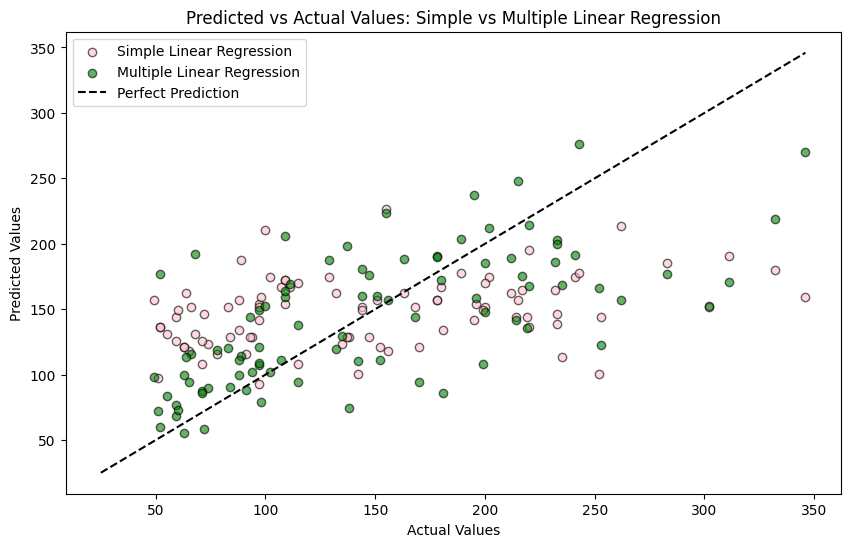

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
data = load_diabetes(as_frame=True)
df_d = data.frame

# Target variable
y = df_d['target']

### Simple Linear Regression (with feature 's6')
feature_name = 's6'  # Choosing one independent variable for simple linear regression
X_simple = df_d[[feature_name]].values  # Feature 's6'

# Split data into training and testing sets (Simple Linear Regression)
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=1)

# Train Simple Linear Regression Model
lr_model_simple = LinearRegression().fit(X_train_simple, y_train_simple)

# Predict and calculate MSE for Simple Linear Regression
y_pred_simple = lr_model_simple.predict(X_test_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
print(f"Simple Linear Regression MSE (using '{feature_name}'): {mse_simple}")

### Multiple Linear Regression (using all features)
X_multiple = df_d.drop(columns='target')  # All features except the target

# Split data into training and testing sets (Multiple Linear Regression)
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=1)

# Train Multiple Linear Regression Model
lr_model_multiple = LinearRegression().fit(X_train_multiple, y_train_multiple)

# Predict and calculate MSE for Multiple Linear Regression
y_pred_multiple = lr_model_multiple.predict(X_test_multiple)
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
print(f"Multiple Linear Regression MSE (using all features): {mse_multiple}")

### MSE Comparison
print(f"\nComparison of MSE:")
print(f"Simple Linear Regression MSE (using '{feature_name}'): {mse_simple}")
print(f"Multiple Linear Regression MSE (using all features): {mse_multiple}")

### Plot: Comparison of Simple vs Multiple Linear Regression
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted (Simple Linear Regression)
plt.scatter(y_test_simple, y_pred_simple, color='pink', edgecolor='k', label='Simple Linear Regression', alpha=0.6)

# Scatter plot for actual vs predicted (Multiple Linear Regression)
plt.scatter(y_test_multiple, y_pred_multiple, color='green', edgecolor='k', label='Multiple Linear Regression', alpha=0.6)

# Line for perfect prediction (y = y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', label='Perfect Prediction')

# Plot aesthetics
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values: Simple vs Multiple Linear Regression')
plt.legend()
plt.show()